<a href="https://colab.research.google.com/github/camilaccosta/Estatistica/blob/main/projeto_grupo2_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto de Estatística - Turma - 735 - Grupo 02 

Componentes: 

- Camila Cardoso
- Fábio Barreto
- Marcelo Vega

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from scipy.stats import norm
from scipy.stats import t as t_student


#**Visualização Inicial do Data Frame:**

In [ ]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv')

In [ ]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

#**Milestone 1 - Amostra e Descrição**




##**1.Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.**

In [ ]:
medical_care_expenditure = df["Medical Care Expenditure"]
medical_care_expenditure

0        3457
1        3520
2          70
3          60
4         140
         ... 
41539     294
41540     890
41541     540
41542     314
41543     330
Name: Medical Care Expenditure, Length: 41544, dtype: int64

In [ ]:
medical_care_expenditure.max()

1049275

In [ ]:
#calculando a média: 
media_mce = medical_care_expenditure.mean()
media_mce

7160.230935875216

In [ ]:
#calculando a média: 
desvio_mce = medical_care_expenditure.std()
desvio_mce

26902.002274617116

In [ ]:
#dados:
erro_mce = 500
confianca = 0.95
significancia = 1 - confianca


In [ ]:
#Calculando o Z de alpha: 
z_alpha_mce = norm.ppf(confianca +(significancia/2))
print(f" O Z de alpha é : {z_alpha_mce.round(2)}")

#Calculando o número mínimo da amostra:
n_minimo_mce = (z_alpha_mce* desvio_mce/ erro_mce)**2

#Calculando o tamanho da amostra para erro máximo de 500: 

n_amostra_mce = round(np.ceil(n_minimo_mce)) # arredondando o valor para número inteiro.
print(f" O tamanho mínimo da amostra para um erro máximo de 500 é : {n_amostra_mce}")

amostra_mce= medical_care_expenditure.sample(n_amostra_mce)

 O Z de alpha é : 1.96
 O tamanho mínimo da amostra para um erro máximo de 500 é : 11121


In [ ]:
amostra_mce = pd.DataFrame(amostra_mce)
amostra_mce_ordenada = amostra_mce.sort_values(by= 'Medical Care Expenditure', ascending= True)


In [ ]:
amostra_mce_ordenada

,Medical Care Expenditure
40714,0
18081,0
20614,0
14612,0
30130,0
...,...
27188,572400
30488,601500
8256,735164
16789,767726


##**2.Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.**

In [ ]:
amostra_do_df = df.sample(n_amostra_mce)
amostra_do_df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
5177,662098,III - Central Luzon,214223,Enterpreneurial Activities,0,33332,10062,46808,29388,10360,...,1,1,2,1,0,2,1,1,0,1
7433,84179,V - Bicol Region,39414,Other sources of Income,0,19457,17256,2610,4508,1832,...,0,0,0,0,0,1,0,0,0,0
24037,733996,VII - Central Visayas,72153,Other sources of Income,0,26534,19271,11046,6626,8265,...,1,0,0,0,0,2,2,1,0,0
21958,361500,X - Northern Mindanao,92047,Other sources of Income,0,28086,23920,5865,5520,535,...,1,1,1,0,0,4,1,0,0,0
7671,127515,V - Bicol Region,98539,Other sources of Income,0,38316,32852,7394,18734,1074,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24062,171800,VII - Central Visayas,77552,Enterpreneurial Activities,0,18336,8761,4530,21514,450,...,0,0,0,0,0,1,0,0,0,1
6716,140005,II - Cagayan Valley,96204,Wage/Salaries,0,23624,19000,27980,7700,1062,...,0,0,0,0,0,2,0,0,0,0
13392,138117,I - Ilocos Region,70440,Wage/Salaries,1,17761,14490,7820,10228,955,...,0,1,0,0,0,2,0,0,0,1
10293,594200,VII - Central Visayas,221412,Other sources of Income,0,40762,30590,9542,49640,25500,...,1,1,1,1,1,5,1,1,0,1


In [ ]:
print(amostra_do_df.columns.values)

['Total Household Income' 'Region' 'Total Food Expenditure'
 'Main Source of Income' 'Agricultural Household indicator'
 'Bread and Cereals Expenditure' 'Total Rice Expenditure'
 'Meat Expenditure' 'Total Fish and  marine products Expenditure'
 'Fruit Expenditure' 'Vegetables Expenditure'
 'Restaurant and hotels Expenditure' 'Alcoholic Beverages Expenditure'
 'Tobacco Expenditure' 'Clothing, Footwear and Other Wear Expenditure'
 'Housing and water Expenditure' 'Imputed House Rental Value'
 'Medical Care Expenditure' 'Transportation Expenditure'
 'Communication Expenditure' 'Education Expenditure'
 'Miscellaneous Goods and Services Expenditure'
 'Special Occasions Expenditure' 'Crop Farming and Gardening expenses'
 'Total Income from Entrepreneurial Acitivites' 'Household Head Sex'
 'Household Head Age' 'Household Head Marital Status'
 'Household Head Highest Grade Completed'
 'Household Head Job or Business Indicator' 'Household Head Occupation'
 'Household Head Class of Worker' 'Type 

In [ ]:
#Análise descritiva das variáveis quantitativas:
amostra_do_df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,1.112100e+04,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,...,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,2.451903e+05,85024.791386,0.434943,25174.150346,18246.005215,10556.225250,10487.359410,2557.459041,5008.790037,15269.368942,...,0.395378,0.322093,0.129665,0.077601,0.058358,1.890118,0.320115,0.134790,0.012409,0.295027
std,2.873481e+05,51423.023589,0.686010,13274.609735,11608.094907,10544.555498,7696.027441,3618.191139,3341.321135,23081.116285,...,0.531602,0.478143,0.444088,0.332857,0.276659,1.553128,0.748763,0.354943,0.122286,0.559983
min,1.573200e+04,6275.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.047740e+05,50898.000000,0.000000,16401.000000,10920.000000,3330.000000,5464.000000,1020.000000,2890.000000,1915.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.626720e+05,72687.000000,0.000000,23346.000000,16600.000000,7330.000000,8620.000000,1800.000000,4311.000000,7240.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.914040e+05,105775.000000,1.000000,31631.000000,23983.000000,14283.000000,13372.000000,3085.000000,6299.000000,19880.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
max,1.163936e+07,720007.000000,2.000000,437467.000000,429640.000000,261566.000000,113749.000000,273769.000000,74800.000000,475200.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


# **Milestone 2 - Inferência Estatística**

## **1. Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).**

In [ ]:
confianca = 0.95
significancia = 1 - confianca
n = len(df)
gl = n - 1 # graus de liberdade

In [ ]:
colunas_selecionadas = ['Medical Care Expenditure', 'Education Expenditure']
df_intervalo_confianca = df.filter(items = colunas_selecionadas)
df_intervalo_confianca.head(5)

,Medical Care Expenditure,Education Expenditure
0,3457,36200
1,3520,29300
2,70,425
3,60,300
4,140,0


In [ ]:
media_medical= df['Medical Care Expenditure'].mean()
media_education = df['Education Expenditure'].mean()

In [ ]:
# Desvio para Medical Care Expenditure:
desvio_medical= df['Medical Care Expenditure'].std()
# Desvio para Education Expenditure:
desvio_education = df['Education Expenditure'].std()

In [ ]:
# T de alpha: 
t_alpha = t_student.ppf(confianca + significancia / 2, df=gl)
t_alpha

1.9600210901697244

In [ ]:
# Erro para Medical Care Expenditure:
erro_medical = t_alpha * (desvio_medical / np.sqrt(n))
erro_medical

258.6968822547701

In [ ]:
# Erro  para Education Expenditure:
erro_education = t_alpha * (desvio_education / np.sqrt(n))
erro_education

204.04924888910872

In [ ]:
# Intervalo para Medical Care Expenditure:
(media_medical - erro_medical,  media_medical + erro_medical)

(6901.534053620446, 7418.927818129987)

In [ ]:
# Intervalo para Education Expenditure:
(media_education - erro_education,  media_education + erro_education)

(7269.451232528184, 7677.549730306401)

## **2. Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.**

In [ ]:
colunas_selecionadas2= ['Household Head Sex', 'Total Number of Family members']
df_diferenca_media = df.filter(items = colunas_selecionadas2)
df_diferenca_media.head(5)

,Household Head Sex,Total Number of Family members
0,Female,4
1,Male,3
2,Male,6
3,Male,3
4,Male,4


In [ ]:
n_soma_amostras= df_diferenca_media['Total Number of Family members'].count()
n_soma_amostras

41544

In [ ]:
df_diferenca_media['Household Head Sex'].value_counts()

Male      32483
Female     9061
Name: Household Head Sex, dtype: int64

In [ ]:
df_homem = df_diferenca_media[df_diferenca_media['Household Head Sex'] == 'Male']
df_mulher = df_diferenca_media[df_diferenca_media['Household Head Sex'] == 'Female']

In [ ]:
homem_sample = df_homem.sample(n=9000, random_state = 101)
mulher_sample = df_mulher.sample(n=9000, random_state = 101)

In [ ]:
homem_sample.shape

(9000, 2)

In [ ]:
confianca = 0.95
significancia = 1 - confianca

- h0: media_homem = media_mulher
- h1: media homem != media mulher

---

- h0: media_homem - media_mulher = 0
- h1: media homem - media mulher != 0

In [ ]:
D0 = 0

In [ ]:
z_alpha_2 = norm.ppf(confianca + significancia/2)
z_alpha_2

1.959963984540054

In [ ]:
n = 9000

media_h = homem_sample['Total Number of Family members'].mean()
desvio_h = homem_sample['Total Number of Family members'].std()

media_m = mulher_sample['Total Number of Family members'].mean()
desvio_m = mulher_sample['Total Number of Family members'].std()

In [ ]:
numerador = (media_h - media_m) - D0
denominador = np.sqrt(desvio_h**2/n + desvio_m**2/n)
z = numerador/denominador
z

29.748800543903563

In [ ]:
z_alpha_2 < z

True

z > z_alpha_2, logo, descartamos h0

In [ ]:
p_valor = norm.sf(z)*2
p_valor,100

(1.7972077202511423e-194, 100)

In [ ]:
p_valor <= significancia

True

#### Logo, de fato rejeitamos H0, e concluímos que em um intervalo de 95% de confiança, existe diferença na média de total de membros entre as famílias chefiadas por homens e mulheres.

---

## **3. Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).**

*Considere “Enteroreneurial activities” e “other sources of income” como "outros".* 

In [ ]:
df['Main Source of Income'].unique()

array(['Wage/Salaries', 'Other sources of Income',
       'Enterpreneurial Activities'], dtype=object)

In [ ]:
df_filtrado = df[['Main Source of Income', 'Total Household Income']]
df_filtrado.head()

,Main Source of Income,Total Household Income
0,Wage/Salaries,480332
1,Wage/Salaries,198235
2,Wage/Salaries,82785
3,Wage/Salaries,107589
4,Wage/Salaries,189322


In [ ]:
df_filtrado['Main Source of Income'].value_counts()

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64

In [ ]:
df_wage = df_filtrado[df_filtrado['Main Source of Income'] == 'Wage/Salaries']
df_outros = df_filtrado[df_filtrado['Main Source of Income'] != 'Wage/Salaries']

In [ ]:
confianca = 0.95
significancia = 1 - confianca

 - h0: media_wage = media_outros
 - h1: media_wage != media_outros

In [ ]:
z_alpha_2 = norm.ppf(confianca + significancia/2)
z_alpha_2

1.959963984540054

In [ ]:
media_wage = df_wage['Total Household Income'].mean()
desvio_wage = df_wage['Total Household Income'].std()
n_wage = df_wage.shape[0]

media_outros = df_outros['Total Household Income'].mean()
desvio_outros = df_outros['Total Household Income'].std()
n_outros = df_outros.shape[0]

media_wage, media_outros

(267414.9520796547, 228417.14747589338)

In [ ]:
numerador = media_wage - media_outros
denominador = np.sqrt(desvio_wage**2/n_wage + desvio_outros**2/n_outros)
z_teste = numerador/denominador
z_teste

13.939448995426796

In [ ]:
z_teste > z_alpha_2

True

In [ ]:
p_valor = norm.sf(z_teste)*2
p_valor

3.6474520098527646e-44

#### Logo, existe diferença entre as rendas totais médias entre quem tem como fonte de renda um salário e outros métodos.

---

#**Milestone 3 - Previsão de Renda Com Regressão Linear**



##**1.Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.**

In [ ]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
df_filtrado = df.filter(items = df.describe().columns)

In [ ]:
df_treino, df_teste  = tts(df_filtrado, train_size=0.7, random_state=101)


In [ ]:
len(df.columns), len(df.describe().columns)

(60, 45)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X1 = df_treino.drop(columns = 'Total Household Income')
y1 = df_treino['Total Household Income']
df_treino.head()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
15643,144825,110425,0,26533,23640,18270,20862,1370,8383,19150,...,0,0,0,0,0,2,0,0,0,1
26790,158025,66763,1,31946,24385,3875,20611,650,3320,2414,...,0,0,0,0,0,0,0,0,0,0
12007,133904,38530,0,12386,9984,7280,3820,2750,3471,1300,...,1,0,0,0,0,1,0,0,0,0
1769,181893,99592,0,14529,10018,12150,9432,2170,3555,20880,...,1,1,0,0,0,2,0,0,0,0
36952,401004,182676,2,33753,22880,33838,13608,3207,10927,36950,...,1,1,0,0,0,5,1,0,0,0


In [ ]:
lr1 = LinearRegression().fit(X1, y1)

In [ ]:
lr1.score(X1, y1)

0.811611090277363

In [ ]:
X1t = df_teste.drop(columns = 'Total Household Income')
y1t = df_teste['Total Household Income']

lr1.score(X1t,y1t)

0.8636915248608075

In [ ]:
y_pred1 = lr1.predict(X1t)

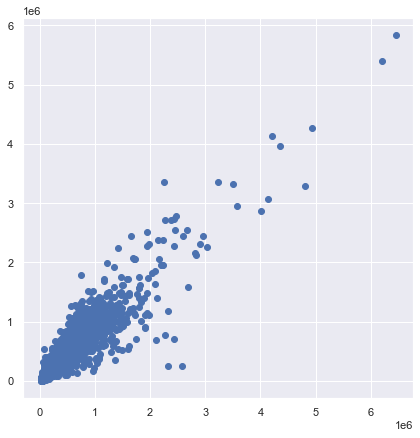

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y1t, y_pred1);

In [ ]:
residuos1 = y1t - y_pred1

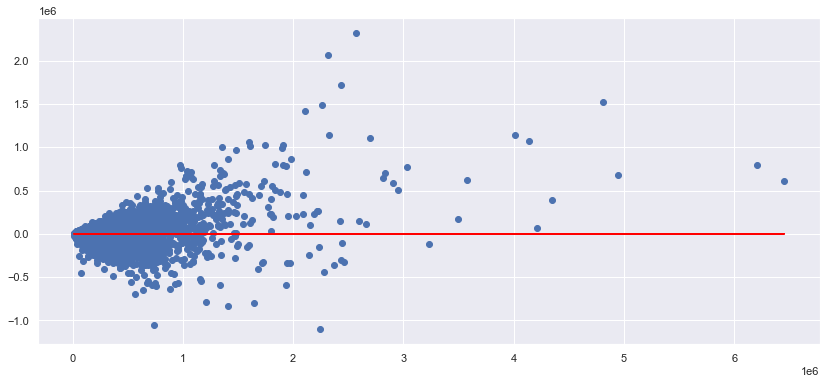

In [ ]:
plt.figure(figsize=(14, 6))
plt.scatter(y1t, residuos1);
plt.plot(y1t, [273]*y1t.shape[0],color='red')

In [ ]:
residuos1.mean()

273.79648361090784

<AxesSubplot:>

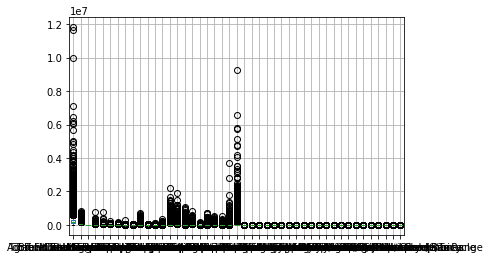

In [ ]:
df.boxplot()

In [ ]:
from scipy.stats import normaltest

In [ ]:
z,p = normaltest(residuos1)
p

0.0

In [ ]:
sns.set()

<AxesSubplot:xlabel='Total Household Income', ylabel='Count'>

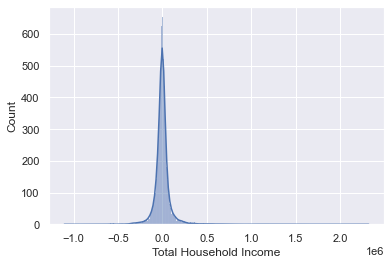

In [ ]:
sns.histplot(residuos1, kde=True)

In [ ]:
import statsmodels.api as sm

In [ ]:
x1 = sm.add_constant(X1)
modelo_inicial = sm.OLS(y1, x1).fit()

modelo_inicial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.812
Model:                                OLS   Adj. R-squared:                  0.811
Method:                     Least Squares   F-statistic:                     2843.
Date:                    Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                            21:00:16   Log-Likelihood:            -3.8263e+05
No. Observations:                   29080   AIC:                         7.653e+05
Df Residuals:                       29035   BIC:                         7.657e+05
Df Model:                              44                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          -3.27e+04   4169.757     -7.842      0.000   -4.09e+04   -2.45e+04
Total Food Expenditure                            0.5523      0.076      7.253      0.000       0.403       0.702
Agricultural Household indicator              -5008.2987   1161.326     -4.313      0.000   -7284.550   -2732.047
Bread and Cereals Expenditure                    -0.1847      0.159     -1.165      0.244      -0.495       0.126
Total Rice Expenditure                           -0.1884      0.135     -1.399      0.162      -0.452       0.076
Meat Expenditure                                  0.1062      0.144      0.739      0.460      -0.175       0.388
Total Fish and  marine products Expenditure       0.9752      0.146      6.671      0.000       0.689       1.262
Fruit Expenditure                                 0.0740      0.305      0.243      0.808      -0.524       0.672
Vegetables Expenditure                           -0.9541      0.303     -3.147      0.002      -1.548      -0.360
Restaurant and hotels Expenditure                 0.1559      0.084      1.859      0.063      -0.008       0.320
Alcoholic Beverages Expenditure                   0.5293      0.357      1.482      0.138      -0.171       1.229
Tobacco Expenditure                              -0.2773      0.195     -1.419      0.156      -0.660       0.106
Clothing, Footwear and Other Wear Expenditure     1.8215      0.137     13.298      0.000       1.553       2.090
Housing and water Expenditure                     0.7770      0.044     17.519      0.000       0.690       0.864
Imputed House Rental Value                        0.4035      0.051      7.876      0.000       0.303       0.504
Medical Care Expenditure                          0.7728      0.028     27.324      0.000       0.717       0.828
Transportation Expenditure                        1.0089      0.054     18.824      0.000       0.904       1.114
Communication Expenditure                         4.8851      0.186     26.316      0.000       4.521       5.249
Education Expenditure                             0.8927      0.039     22.840      0.000       0.816       0.969
Miscellaneous Goods and Services Expenditure      2.7652      0.061     45.544      0.000       2.646       2.884
Special Occasions Expenditure                     1.2021      0.061     19.720      0.000       1.083       1.322
Crop Farming and Gardening expenses               0.0720      0.016      4.459      0.000       0.040       0.104
Total Income from Entrepreneurial Acitivites      0.6746      0.006    115.495      0.000       0.663       0.686
Household Head Age                              578.7761     60.649      9.

In [ ]:
x1t = sm.add_constant(X1t)
modelo_inicial = sm.OLS(y1t, x1t).fit()

modelo_inicial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.869
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     1878.
Date:                    Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                            21:02:46   Log-Likelihood:            -1.6144e+05
No. Observations:                   12464   AIC:                         3.230e+05
Df Residuals:                       12419   BIC:                         3.233e+05
Df Model:                              44                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -2.378e+04   5118.608     -4.646      0.000   -3.38e+04   -1.37e+04
Total Food Expenditure                            0.4738      0.095      4.987      0.000       0.288       0.660
Agricultural Household indicator              -7076.9339   1442.249     -4.907      0.000   -9903.965   -4249.903
Bread and Cereals Expenditure                     0.1904      0.203      0.936      0.349      -0.208       0.589
Total Rice Expenditure                           -0.2468      0.173     -1.422      0.155      -0.587       0.093
Meat Expenditure                                  0.2364      0.182      1.302      0.193      -0.120       0.592
Total Fish and  marine products Expenditure      -0.0575      0.186     -0.309      0.757      -0.422       0.307
Fruit Expenditure                                 1.0704      0.483      2.215      0.027       0.123       2.018
Vegetables Expenditure                           -1.1567      0.381     -3.038      0.002      -1.903      -0.410
Restaurant and hotels Expenditure                 0.2014      0.104      1.943      0.052      -0.002       0.405
Alcoholic Beverages Expenditure                   0.3776      0.468      0.807      0.420      -0.540       1.295
Tobacco Expenditure                               0.2289      0.243      0.941      0.347      -0.248       0.706
Clothing, Footwear and Other Wear Expenditure     3.5086      0.168     20.841      0.000       3.179       3.839
Housing and water Expenditure                     0.7059      0.054     13.090      0.000       0.600       0.812
Imputed House Rental Value                        0.7351      0.062     11.892      0.000       0.614       0.856
Medical Care Expenditure                          0.7518      0.038     19.599      0.000       0.677       0.827
Transportation Expenditure                        1.7822      0.074     24.095      0.000       1.637       1.927
Communication Expenditure                         2.1814      0.227      9.596      0.000       1.736       2.627
Education Expenditure                             0.7058      0.055     12.766      0.000       0.597       0.814
Miscellaneous Goods and Services Expenditure      2.7179      0.078     34.723      0.000       2.564       2.871
Special Occasions Expenditure                     0.8976      0.081     11.020      0.000       0.738       1.057
Crop Farming and Gardening expenses               0.0746      0.024      3.117      0.002       0.028       0.122
Total Income from Entrepreneurial Acitivites      0.6603      0.007     88.935      0.000       0.646       0.675
Household Head Age                              453.3926     74.906      6.